# Biodiversity in national park

The goal of this project is to analyze biodiversity data from the National Parks Service, particulary from the observed species from these locations.

Some important question this project want to answer are:

- What is the distribution of conservation for each species?
- Are some species more likely to be endangered?
- What animal is most prelevant and what is their distribution amongst parks?
- Are the differences between species and their conservation status significant?


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


%matplotlib inline

## Loading the data

The `observation.csv` contains information about the recorded sightings of different species in the national parks. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [2]:
obs = pd.read_csv('observations.csv')
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


The `species_info.csv` contains information about the different species in the national parks. The columns included are:

- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name for each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [3]:
sp = pd.read_csv('species_info.csv')
sp.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


## Data exploration

In [4]:
print('Number of species: {}'.format(sp.scientific_name.nunique()))

Number of species: 5541


In [5]:
print('Number of categories: {}'.format(sp['category'].nunique()))
print('Categories: {}'.format(sp['category'].unique()))

Number of categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [6]:
print('Number of conservation status categories: {}'.format(sp['conservation_status'].nunique()))
print('Conservation statuses: {}'.format(sp['conservation_status'].unique()))

Number of conservation status categories: 4
Conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [7]:
sp.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [8]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [9]:
obs.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


## Data analysis

In [10]:
sp.fillna('No intervation', inplace=True)
sp.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No intervation        5633
Species of Concern     161
Threatened              10
dtype: int64

In [11]:
conservationCategory = sp[sp['conservation_status'] != 'No intervation']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()

conservationCategory


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0.5, 1.0, 'Number of species for each category group by conservation status')

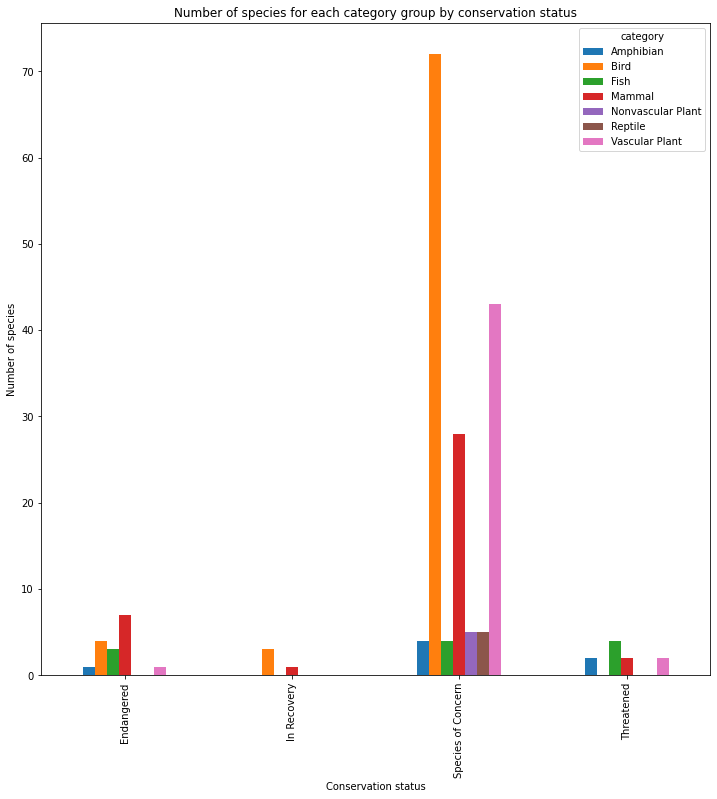

In [12]:
ax = conservationCategory.plot(kind = 'bar', figsize = (12, 12))

ax.set_xlabel('Conservation status')
ax.set_ylabel('Number of species')
ax.set_title('Number of species for each category group by conservation status')

In [13]:
sp['is_protected'] = sp['conservation_status'] != 'No intervation'
sp.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No intervation,False
1,Mammal,Bos bison,"American Bison, Bison",No intervation,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No intervation,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No intervation,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No intervation,False


In [21]:
category_counts = sp.groupby(['category', 'is_protected'])\
                    .scientific_name.nunique()\
                    .reset_index()\
                    .pivot(columns='is_protected',
                          index = 'category',
                          values='scientific_name')\
                    .reset_index()

category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [24]:
category_counts['percent_protected'] = category_counts['protected'] / \
                                        (category_counts['protected'] + category_counts['not_protected']) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [28]:
from scipy.stats import chi2_contingency

contingecy1 = [[30, 146],
              [75, 413]]

chi2_contingency(contingecy1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))